Physics 215 (1st Semester AY 2022-2023)

Richelle Jade L. Tuquero

# Session 1: HPC and the Julia framework

\textbf{OBJECTIVE}: Confirm Julia framework and Base speed

- KR1: Use `@code_*` to examine a simple function. The `*` is replaceable by `native`, `typed`, `warntype`, and others. Discover them.

- KR2: Demonstrate that Julia is able to determine constants in codes.

- KR3: Demonstrate Julia's type-inference and multiple dispatch.

- KR3: Show the difference, if any, between your own sum function `my_sum(x::Vector)` and `@time`. Use a `for`-loop for your *customized* sum function.

- KR4: Replicate plotting the Mandelbrot. Use a separate file `Mandelbrot.jl` to contain the function code. Use `include()` function to load the file.

- KR5: Plot of the time it takes for the function to run using `@time` macro for the given grid size `n`.

- KR6: Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best `@time` output to use for this?

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/Physics 215/Submission/Session 1`


In [2]:
# Adding packages
Pkg.add("Plots")
Pkg.add("CurveFit")
Pkg.update()

# Importing packages
using Plots
using CurveFit


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 1/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 1/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 1/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 1/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 1/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 1/Manifest.toml`


# KR1

Use ``@code_*`` to examine a simple function. The * is replaceable by native, typed, warntype, and others. Discover them.


We want to define a function that will determine the position of an object after some time $t$ with constant velocity called ``pos``. Before that we check if there is an existing function with the same name.

In [3]:
? pos

search: position ComposedFunction CompositeException transpose Plots

Couldn't find pos
Perhaps you meant cos, pop!, plot, prod, pie, png, pi, pwd, eps, ans or mov


No documentation found.

Binding `pos` does not exist.


Since there is no documentation for ``pos``, we will now define the function such that it will solve the equation $x=x_0+vt$.

In [4]:
"""
    pos( x0, v, t )
Calculates the position for a particle with constant velocity.
-Input: `x0` is the initial position
        `v` is the velocity
        `t` is the time
-Output: `x` is the position after time t
"""

function pos( x0, v, t)
    x = x0 + v*t
    return x
end

pos (generic function with 1 method)

## The ``@code_native`` 

We will now start examining the function ``pos()`` using ``@code_native``. To get a general idea of what ``@code_native`` is, we will use help ``?``.

In [5]:
? @code_native

```
@code_native
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_native`](@ref) on the resulting expression.

Set any of the optional keyword arguments `syntax`, `debuginfo`, `binary` or `dump_module` by putting it before the function call, like this:

```
@code_native syntax=:intel debuginfo=:default binary=true dump_module=false f(x)
```

  * Set assembly syntax by setting `syntax` to `:att` (default) for AT&T syntax or `:intel` for Intel syntax.
  * Specify verbosity of code comments by setting `debuginfo` to `:source` (default) or `:none`.
  * If `binary` is `true`, also print the binary machine code for each instruction precedented by an abbreviated address.
  * If `dump_module` is `false`, do not print metadata such as rodata or directives.

See also: [`code_native`](@ref), [`@code_llvm`](@ref), [`@code_typed`](@ref) and [`@code_lowered`](@ref)


In [6]:
? code_native

search: code_native @code_native



```
code_native([io=stdout,], f, types; syntax=:att, debuginfo=:default, binary=false, dump_module=true)
```

Prints the native assembly instructions generated for running the method matching the given generic function and type signature to `io`.

  * Set assembly syntax by setting `syntax` to `:att` (default) for AT&T syntax or `:intel` for Intel syntax.
  * Specify verbosity of code comments by setting `debuginfo` to `:source` (default) or `:none`.
  * If `binary` is `true`, also print the binary machine code for each instruction precedented by an abbreviated address.
  * If `dump_module` is `false`, do not print metadata such as rodata or directives.

See also: [`@code_native`](@ref), [`code_llvm`](@ref), [`code_typed`](@ref) and [`code_lowered`](@ref)


The general idea that we can infer from the definition of the ``@code_native`` is that this prints the native assembly of the instructions  for the machine to implement the function. We will now try using different combinations of type for our input in the function ``pos()`` to get a better idea what ``@code_native`` does.

In [7]:
@code_native pos(1, 3, 2 )

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 11, 0
	.globl	_julia_pos_2695                 ; -- Begin function julia_pos_2695
	.p2align	2
_julia_pos_2695:                        ; @julia_pos_2695
; ┌ @ In[4]:10 within `pos`
	.cfi_startproc
; %bb.0:                                ; %top
; │ @ In[4]:11 within `pos`
; │┌ @ int.jl:87 within `+`
	madd	x0, x2, x1, x0
; │└
; │ @ In[4]:12 within `pos`
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


In [8]:
@code_native pos(1.0, 3.0, 2.0 )

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 11, 0
	.globl	_julia_pos_2736                 ; -- Begin function julia_pos_2736
	.p2align	2
_julia_pos_2736:                        ; @julia_pos_2736
; ┌ @ In[4]:10 within `pos`
	.cfi_startproc
; %bb.0:                                ; %top
; │ @ In[4]:11 within `pos`
; │┌ @ float.jl:385 within `*`
	fmul	d1, d1, d2
; │└
; │┌ @ float.jl:383 within `+`
	fadd	d0, d1, d0
; │└
; │ @ In[4]:12 within `pos`
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


In [9]:
@code_native pos( 1.0, 3.0, 2)

	.section	__TEXT,__text,regular,pure_instructions
	.build_version macos, 11, 0
	.globl	_julia_pos_2738                 ; -- Begin function julia_pos_2738
	.p2align	2
_julia_pos_2738:                        ; @julia_pos_2738
; ┌ @ In[4]:10 within `pos`
	.cfi_startproc
; %bb.0:                                ; %top
; │ @ In[4]:11 within `pos`
; │┌ @ promotion.jl:389 within `*`
; ││┌ @ promotion.jl:359 within `promote`
; │││┌ @ promotion.jl:336 within `_promote`
; ││││┌ @ number.jl:7 within `convert`
; │││││┌ @ float.jl:146 within `Float64`
	scvtf	d2, x0
; ││└└└└
; ││ @ promotion.jl:389 within `*` @ float.jl:385
	fmul	d1, d2, d1
; │└
; │┌ @ float.jl:383 within `+`
	fadd	d0, d1, d0
; │└
; │ @ In[4]:12 within `pos`
	ret
	.cfi_endproc
; └
                                        ; -- End function
.subsections_via_symbols


We confirm that ``@code_native`` presents the assembly language where we can observe the changes in the instructions and registers depending on the type of the input variables of the function. We also notice the changes of the instructions depending on the type of the inputs (all ``Int64`` or ``Float64``). Moreover, if the type of the inputs are different then there are additional instructions like ``scvtf`` where Julia converted one type to use the ``fmul`` instruction. This shows that the ``@code_native`` shows us the instructions of the machine and how julia manages different input types, and that is by converting the input types such that they have the same type inputs before proceeding with the instructions.

## The ``@code_warntype`` 

Before we begin using ``@code_warntype``, we must know what it does by accessing help ``?``.

In [10]:
? @code_warntype

```
@code_warntype
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_warntype`](@ref) on the resulting expression.


In [11]:
? code_warntype

search: code_warntype @code_warntype



```
code_warntype([io::IO], f, types; debuginfo=:default)
```

Prints lowered and type-inferred ASTs for the methods matching the given generic function and type signature to `io` which defaults to `stdout`. The ASTs are annotated in such a way as to cause "non-leaf" types to be emphasized (if color is available, displayed in red). This serves as a warning of potential type instability. Not all non-leaf types are particularly problematic for performance, so the results need to be used judiciously. In particular, unions containing either [`missing`](@ref) or [`nothing`](@ref) are displayed in yellow, since these are often intentional.

Keyword argument `debuginfo` may be one of `:source` or `:none` (default), to specify the verbosity of code comments.

See [`@code_warntype`](@ref man-code-warntype) for more information.


From the given definition, we get an overall idea that the ``@code_warntype`` displays the methods and warn us about possible errors. To get a better idea with this, let us use the function we have previously defined.

In [12]:
@code_warntype pos( 1, 3, 2)

MethodInstance for pos(::Int64, ::Int64, ::Int64)
  from pos(x0, v, t) in Main at In[4]:10
Arguments
  #self#::Core.Const(pos)
  x0::Int64
  v::Int64
  t::Int64
Locals
  x::Int64
Body::Int64
1 ─ %1 = (v * t)::Int64
│        (x = x0 + %1)
└──      return x



In [13]:
@code_warntype pos( 1.0, 3.0, 2.0)

MethodInstance for pos(::Float64, ::Float64, ::Float64)
  from pos(x0, v, t) in Main at In[4]:10
Arguments
  #self#::Core.Const(pos)
  x0::Float64
  v::Float64
  t::Float64
Locals
  x::Float64
Body::Float64
1 ─ %1 = (v * t)::Float64
│        (x = x0 + %1)
└──      return x



In [14]:
@code_warntype pos( 1.0, 3.0, 2)

MethodInstance for pos(::Float64, ::Float64, ::Int64)
  from pos(x0, v, t) in Main at In[4]:10
Arguments
  #self#::Core.Const(pos)
  x0::Float64
  v::Float64
  t::Int64
Locals
  x::Float64
Body::Float64
1 ─ %1 = (v * t)::Float64
│        (x = x0 + %1)
└──      return x



As shown, we observe that ``@code_warntype`` presents us with the arguements and body of the function that is executed by Julia. It also appears as a pseudo-code which prints the process being ran by the program. 

Notice that there are no possible source of errors in the printed result. A reason for this is that even if the type inputs are different, there is only a single type in the body of the code. For the sake of discussion, let us define a function that will return the body mass ratio or 0 if there is no mass. We will refer to this as ``bmi`` if there is no existing function with the same name.

In [15]:
? bmi

search: binomial BitMatrix AbstractMatrix

Couldn't find bmi
Perhaps you meant bar, big, gui, Cmd, cmp, fma, im, min, mv, pi, rm, webm or BGR


No documentation found.

Binding `bmi` does not exist.


In [16]:
"""
    bmi( kg, m )
Calculates the body mass ratio and returns zero when there is no mass.
-Input: `kg` is the mass in kilograms
        `m` is the height in meters
-Output: `BMI`
         `0` for no mass
"""

function bmi(kg, m)
    BMI = kg/m^2   # Calculates BMI
    if m == 0      
        println("Error! There is no mass")
        return 0
    end
    return BMI
end

bmi (generic function with 1 method)

In [17]:
@code_warntype bmi( 10, 2 )

MethodInstance for bmi(::Int64, ::Int64)
  from bmi(kg, m) in Main at In[16]:10
Arguments
  #self#::Core.Const(bmi)
  kg::Int64
  m::Int64
Locals
  BMI::Float64
Body::Union{Float64, Int64}
1 ─ %1 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %2 = (%1)()::Core.Const(Val{2}())
│   %3 = Base.literal_pow(Main.:^, m, %2)::Int64
│        (BMI = kg / %3)
│   %5 = (m == 0)::Bool
└──      goto #3 if not %5
2 ─      Main.println("Error! There is no mass")
└──      return 0
3 ─      return BMI



In [18]:
@code_warntype bmi( 10.0, 2.0 )

MethodInstance for bmi(::Float64, ::Float64)
  from bmi(kg, m) in Main at In[16]:10
Arguments
  #self#::Core.Const(bmi)
  kg::Float64
  m::Float64
Locals
  BMI::Float64
Body::Union{Float64, Int64}
1 ─ %1 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %2 = (%1)()::Core.Const(Val{2}())
│   %3 = Base.literal_pow(Main.:^, m, %2)::Float64
│        (BMI = kg / %3)
│   %5 = (m == 0)::Bool
└──      goto #3 if not %5
2 ─      Main.println("Error! There is no mass")
└──      return 0
3 ─      return BMI



In [19]:
@code_warntype bmi( 10.0, 2 )

MethodInstance for bmi(::Float64, ::Int64)
  from bmi(kg, m) in Main at In[16]:10
Arguments
  #self#::Core.Const(bmi)
  kg::Float64
  m::Int64
Locals
  BMI::Float64
Body::Union{Float64, Int64}
1 ─ %1 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %2 = (%1)()::Core.Const(Val{2}())
│   %3 = Base.literal_pow(Main.:^, m, %2)::Int64
│        (BMI = kg / %3)
│   %5 = (m == 0)::Bool
└──      goto #3 if not %5
2 ─      Main.println("Error! There is no mass")
└──      return 0
3 ─      return BMI



We notice that there are possible errors shown in red due to different variables called in the body and the output. This can be fixed by either making sure that the type of the variables will not be a problem, or by determining the type of the variable using ``typeof()`` or ``eltype()``. Note that if we want to convert a variable into a specific type, then we use the function ``convert()`` which has two inputs - the type and the variable.

We define a modified version of ``bmi()``, which we will refer to as ``bmi_fix()``.

In [20]:
? bmi_fix

search:

Couldn't find bmi_fix
Perhaps you meant bmi


No documentation found.

Binding `bmi_fix` does not exist.


In [21]:
"""
    bmi_fix( kg, m )
Modified version of the function ``bmi()``
-Input: `kg` is the mass in kilograms
        `m` is the height in meters
-Output: BMI
         `0` for no mass
"""
function bmi_fix(kg, m)
    BMI = kg/m^2
    if convert(typeof(BMI),m) == 0   # This converts the type of ``m`` to match the type of ``BMI``.
        println("Error! There is no mass")
        return zero(typeof(BMI))
    end
    return BMI
end

bmi_fix

In [22]:
@code_warntype bmi_fix(10, 2)

MethodInstance for bmi_fix(::Int64, ::Int64)
  from bmi_fix(kg, m) in Main at In[21]:9
Arguments
  #self#::Core.Const(bmi_fix)
  kg::Int64
  m::Int64
Locals
  BMI::Float64
Body::Float64
1 ─ %1  = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %2  = (%1)()::Core.Const(Val{2}())
│   %3  = Base.literal_pow(Main.:^, m, %2)::Int64
│         (BMI = kg / %3)
│   %5  = Main.typeof(BMI)::Core.Const(Float64)
│   %6  = Main.convert(%5, m)::Float64
│   %7  = (%6 == 0)::Bool
└──       goto #3 if not %7
2 ─       Main.println("Error! There is no mass")
│   %10 = Main.typeof(BMI)::Core.Const(Float64)
│   %11 = Main.zero(%10)::Core.Const(0.0)
└──       return %11
3 ─       return BMI



In [23]:
@code_warntype bmi_fix(10.0, 2.0)

MethodInstance for bmi_fix(::Float64, ::Float64)
  from bmi_fix(kg, m) in Main at In[21]:9
Arguments
  #self#::Core.Const(bmi_fix)
  kg::Float64
  m::Float64
Locals
  BMI::Float64
Body::Float64
1 ─ %1  = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %2  = (%1)()::Core.Const(Val{2}())
│   %3  = Base.literal_pow(Main.:^, m, %2)::Float64
│         (BMI = kg / %3)
│   %5  = Main.typeof(BMI)::Core.Const(Float64)
│   %6  = Main.convert(%5, m)::Float64
│   %7  = (%6 == 0)::Bool
└──       goto #3 if not %7
2 ─       Main.println("Error! There is no mass")
│   %10 = Main.typeof(BMI)::Core.Const(Float64)
│   %11 = Main.zero(%10)::Core.Const(0.0)
└──       return %11
3 ─       return BMI



In [24]:
@code_warntype bmi_fix(10.0, 2)

MethodInstance for bmi_fix(::Float64, ::Int64)
  from bmi_fix(kg, m) in Main at In[21]:9
Arguments
  #self#::Core.Const(bmi_fix)
  kg::Float64
  m::Int64
Locals
  BMI::Float64
Body::Float64
1 ─ %1  = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %2  = (%1)()::Core.Const(Val{2}())
│   %3  = Base.literal_pow(Main.:^, m, %2)::Int64
│         (BMI = kg / %3)
│   %5  = Main.typeof(BMI)::Core.Const(Float64)
│   %6  = Main.convert(%5, m)::Float64
│   %7  = (%6 == 0)::Bool
└──       goto #3 if not %7
2 ─       Main.println("Error! There is no mass")
│   %10 = Main.typeof(BMI)::Core.Const(Float64)
│   %11 = Main.zero(%10)::Core.Const(0.0)
└──       return %11
3 ─       return BMI



As shown, there is no longer any possible errors marked in red since the body now has only one type.

## The ``@code_typed`` 
Let us determine the definition of ``@code_typed``.

In [25]:
? @code_typed

```
@code_typed
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_typed`](@ref) on the resulting expression. Use the optional argument `optimize` with

```
@code_typed optimize=true foo(x)
```

to control whether additional optimizations, such as inlining, are also applied.


In [26]:
? code_typed

search: code_typed @code_typed code_warntype @code_warntype



```
code_typed(f, types; kw...)
```

Returns an array of type-inferred lowered form (IR) for the methods matching the given generic function and type signature.

# Keyword Arguments

  * `optimize=true`: controls whether additional optimizations, such as inlining, are also applied.
  * `debuginfo=:default`: controls the amount of code metadata present in the output,

possible options are `:source` or `:none`.

# Internal Keyword Arguments

This section should be considered internal, and is only for who understands Julia compiler internals.

  * `world=Base.get_world_counter()`: optional, controls the world age to use when looking up methods,

use current world age if not specified.

  * `interp=Core.Compiler.NativeInterpreter(world)`: optional, controls the interpreter to use,

use the native interpreter Julia uses if not specified.

# Example

One can put the argument types in a tuple to get the corresponding `code_typed`.

```julia
julia> code_typed(+, (Float64, Float64))
1-element Vector{Any}:
 CodeInfo(
1 ─ %1 = Base.add_float(x, y)::Float64
└──      return %1
) => Float64
```


Based on the definition for ``@code_typed``, this prints the type-inferred lowered form (IR) unlike the ``@code_warntype`` which is ASTs. To better understand this we implement the simple function previously created.

In [27]:
@code_typed pos( 1, 3, 2 )

CodeInfo(
1 ─ %1 = Base.mul_int(v, t)::Int64
│   %2 = Base.add_int(x0, %1)::Int64
└──      return %2
) => Int64

In [28]:
@code_typed pos( 1.0, 3.0, 2.0 )

CodeInfo(
1 ─ %1 = Base.mul_float(v, t)::Float64
│   %2 = Base.add_float(x0, %1)::Float64
└──      return %2
) => Float64

In [29]:
@code_typed pos( 1.0, 3, 2 )

CodeInfo(
1 ─ %1 = Base.mul_int(v, t)::Int64
│   %2 = Base.sitofp(Float64, %1)::Float64
│   %3 = Base.add_float(x0, %2)::Float64
└──      return %3
) => Float64

We notice that when the input variables are both integers (default is ``Int64`` in my computer), then the type of the output is also ``Int64``. This is the same case for inputs of ``Float64``, which will generate a ``Float64`` output. This tells us that the ``@code_typed`` matches the type of the input and output values. However, if we use a combination of ``Float64`` and ``Int64`` as our inputs, it follows the native assembly function we previously showed that wants to use the same data type for the inputs. Hence, the output for combinations of ``Float64`` and ``Int64`` is ``Float64``.

## The ``@code_lowered`` 
Let us check what ``@code_lowered`` does.

In [30]:
? @code_lowered

```
@code_lowered
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_lowered`](@ref) on the resulting expression.


In [31]:
? code_lowered

search: code_lowered @code_lowered



```
code_lowered(f, types; generated=true, debuginfo=:default)
```

Return an array of the lowered forms (IR) for the methods matching the given generic function and type signature.

If `generated` is `false`, the returned `CodeInfo` instances will correspond to fallback implementations. An error is thrown if no fallback implementation exists. If `generated` is `true`, these `CodeInfo` instances will correspond to the method bodies yielded by expanding the generators.

The keyword `debuginfo` controls the amount of code metadata present in the output.

Note that an error will be thrown if `types` are not leaf types when `generated` is `true` and any of the corresponding methods are an `@generated` method.


In [32]:
@code_lowered pos( 1, 3, 2)

CodeInfo(
1 ─ %1 = v * t
│        x = x0 + %1
└──      return x
)

In [33]:
@code_lowered pos( 1.0, 3.0, 2.0)

CodeInfo(
1 ─ %1 = v * t
│        x = x0 + %1
└──      return x
)

In [34]:
@code_lowered pos( 1.0, 3, 2)

CodeInfo(
1 ─ %1 = v * t
│        x = x0 + %1
└──      return x
)

As mentioned in the description, the ``@code_lowered`` is similar to ``@code_typed`` however ``@code_lowered`` returns it in lower forms (IR). Moreover, we also notice how similar it is to the written code for the function and unlike the ``@code_typed`` we don't see the types of the variables in each step. Moreover, there is also no change in the output of ``@code_lowered`` for different combinations of input types of the function. Therefore, this is mainly focused on how to run the function rather than the type.

## The ``@code_llvm`` 
Lastly for KR1, we will now consider ``@code_llvm``.

In [35]:
? @code_llvm

```
@code_llvm
```

Evaluates the arguments to the function or macro call, determines their types, and calls [`code_llvm`](@ref) on the resulting expression. Set the optional keyword arguments `raw`, `dump_module`, `debuginfo`, `optimize` by putting them and their value before the function call, like this:

```
@code_llvm raw=true dump_module=true debuginfo=:default f(x)
@code_llvm optimize=false f(x)
```

`optimize` controls whether additional optimizations, such as inlining, are also applied. `raw` makes all metadata and dbg.* calls visible. `debuginfo` may be one of `:source` (default) or `:none`,  to specify the verbosity of code comments. `dump_module` prints the entire module that encapsulates the function.


In [36]:
? code_llvm

search: code_llvm @code_llvm



```
code_llvm([io=stdout,], f, types; raw=false, dump_module=false, optimize=true, debuginfo=:default)
```

Prints the LLVM bitcodes generated for running the method matching the given generic function and type signature to `io`.

If the `optimize` keyword is unset, the code will be shown before LLVM optimizations. All metadata and dbg.* calls are removed from the printed bitcode. For the full IR, set the `raw` keyword to true. To dump the entire module that encapsulates the function (with declarations), set the `dump_module` keyword to true. Keyword argument `debuginfo` may be one of source (default) or none, to specify the verbosity of code comments.


In [37]:
@code_llvm pos( 1, 3, 2)

;  @ In[4]:10 within `pos`
define i64 @julia_pos_3754(i64 signext %0, i64 signext %1, i64 signext %2) #0 {
top:
;  @ In[4]:11 within `pos`
; ┌ @ int.jl:88 within `*`
   %3 = mul i64 %2, %1
; └
; ┌ @ int.jl:87 within `+`
   %4 = add i64 %3, %0
; └
;  @ In[4]:12 within `pos`
  ret i64 %4
}


In [38]:
@code_llvm pos( 1.0, 3.0, 2.0)

;  @ In[4]:10 within `pos`
define double @julia_pos_3767(double %0, double %1, double %2) #0 {
top:
;  @ In[4]:11 within `pos`
; ┌ @ float.jl:385 within `*`
   %3 = fmul double %1, %2
; └
; ┌ @ float.jl:383 within `+`
   %4 = fadd double %3, %0
; └
;  @ In[4]:12 within `pos`
  ret double %4
}


In [39]:
@code_llvm pos( 1.0, 3, 2)

;  @ In[4]:10 within `pos`
define double @julia_pos_3769(double %0, i64 signext %1, i64 signext %2) #0 {
top:
;  @ In[4]:11 within `pos`
; ┌ @ int.jl:88 within `*`
   %3 = mul i64 %2, %1
; └
; ┌ @ promotion.jl:388 within `+`
; │┌ @ promotion.jl:359 within `promote`
; ││┌ @ promotion.jl:336 within `_promote`
; │││┌ @ number.jl:7 within `convert`
; ││││┌ @ float.jl:146 within `Float64`
       %4 = sitofp i64 %3 to double
; │└└└└
; │ @ promotion.jl:388 within `+` @ float.jl:383
   %5 = fadd double %4, %0
; └
;  @ In[4]:12 within `pos`
  ret double %5
}


Running the ``@code_llvm`` shows the compiled LLVM bitcode for the given function. Unlike the rest of the ``@code_*``, we find it hard to read the printed result of ``@code_llvm``. However, there are some instructions which are similar to that shown when using ``@code_native`` such as converting the type of a variable for different input types. This tells us that this is similar to an assembly language.

# KR2

Demonstrate that Julia is able to determine constants in codes.

Let us define two simple function, ``circum()`` for with constant and ``rec_area()`` for the one without constant.

In [40]:
circum( r ) = 2*pi*r   # Circumference of a circle with radius ``r``.
rec_area( l, w ) = l*w        # Area of a rectangle with length ``l`` and width ``w``.

rec_area (generic function with 1 method)

To determine if Julia can determine the constants, we examine the printed outputs of ``@code_llvm`` and ``@code_typed`` for both functions.

In [41]:
@code_llvm circum( 4.0 )

;  @ In[40]:1 within `circum`
define double @julia_circum_3796(double %0) #0 {
top:
; ┌ @ operators.jl:591 within `*` @ float.jl:385
   %1 = fmul double %0, 0x401921FB54442D18
; └
  ret double %1
}


In [42]:
@code_llvm rec_area( 2,3 )

;  @ In[40]:2 within `rec_area`
define i64 @julia_rec_area_3798(i64 signext %0, i64 signext %1) #0 {
top:
; ┌ @ int.jl:88 within `*`
   %2 = mul i64 %1, %0
; └
  ret i64 %2
}


In [43]:
@code_typed circum( 4.0 )

CodeInfo(
1 ─ %1 = Base.mul_float(6.283185307179586, r)::Float64
└──      return %1
) => Float64

In [44]:
@code_typed rec_area( 2,3 )

CodeInfo(
1 ─ %1 = Base.mul_int(l, w)::Int64
└──      return %1
) => Int64

We observe that Julia can indeed determine constants by the presence of pointers in ``@code_llvm`` and a constant input in ``%1`` for ``@code_typed``.

# KR3

Demonstrate Julia’s type-inference and multiple dispatch.

To determine the type of a variable or number, we simply use ``typeof()`` or ``eltype()``. As an example we show

In [45]:
println("3 is a $(typeof(3)).")
println("3.1 is a $(typeof(3.1)).")

3 is a Int64.
3.1 is a Float64.


Let us now try to demonstrate multiple dispatch. In our function, we will implement multiple methods depending on the type of the variable. But first, to avoid overloading existing functions we check if there are any documentations of a function with name ``typecheck``.

In [46]:
? typecheck()

No documentation found.

Binding `typecheck` does not exist.


Since there are none, we can now define function ``typecheck()``.

In [47]:
# Function typecheck() will state the type of ``x`` in the form of a sentence.
typecheck(x) = "'$x' is some type $(typeof(x))" # General case

# Special cases
typecheck(x::Bool) = "This is $x."
typecheck(x::String) = "'$x' is a string"
typecheck(x::Number) = "'$x' is a number"
typecheck(x::Real) = "'$x' is a real number"
typecheck(x::Rational) = "'$x' is a rational number"
typecheck(x::Int) = "'$x' is an integer"
typecheck(x::Complex) = "'$x' is a complex number"

typecheck (generic function with 8 methods)

We defined one function, with 8 different methods where the function ``typecheck(x)`` behaves differently or implements the function depending on the type of ``x``.

In [48]:
? typecheck

search: typecheck



No documentation found.

`typecheck` is a `Function`.

```
# 8 methods for generic function "typecheck":
[1] typecheck(x::Rational) in Main at In[47]:9
[2] typecheck(x::Complex) in Main at In[47]:11
[3] typecheck(x::Bool) in Main at In[47]:5
[4] typecheck(x::String) in Main at In[47]:6
[5] typecheck(x::Int64) in Main at In[47]:10
[6] typecheck(x::Real) in Main at In[47]:8
[7] typecheck(x::Number) in Main at In[47]:7
[8] typecheck(x) in Main at In[47]:2
```


As we can see, there is now a function named ``typecheck`` which we previously defined. We now implement or demonstrate the outputs of ``typecheck(x)``.

In [49]:
println(typecheck(π))
println(typecheck(4))
println(typecheck(4.5))
println(typecheck("Hello world!"))
println(typecheck(1+2im))
println(typecheck(15<2))

'π' is a real number
'4' is an integer
'4.5' is a real number
'Hello world!' is a string
'1 + 2im' is a complex number
This is false.


# KR3

Show the difference, if any, between your own sum function ``my_sum(x::Vector)`` and ``@time``. Use a for-loop for your customized sum function.

In [50]:
"""
    my_sum( x :: Vector)
calculates the sum of the vectors.
-Input: `x::Vector` arrays of numbers
-Output: `add` the sum of the numbers in x.
"""

function my_sum(x::Vector)
    add = zero(eltype(x))
    for i in x
        add += i
    end
    return add
end

my_sum (generic function with 1 method)

In [51]:
# Generating the random values in x using ``rand()``.
N = 100_000   # Number of values
x = rand( N ); # Gives us N number of random values.

We will now use the ``@time`` macro to determine how long in seconds does it take to run the function and check the allocations.

In [52]:
? @time

```
@time expr
@time "description" expr
```

A macro to execute an expression, printing the time it took to execute, the number of allocations, and the total number of bytes its execution caused to be allocated, before returning the value of the expression. Any time spent garbage collecting (gc), compiling new code, or recompiling invalidated code is shown as a percentage.

Optionally provide a description string to print before the time report.

In some cases the system will look inside the `@time` expression and compile some of the called code before execution of the top-level expression begins. When that happens, some compilation time will not be counted. To include this time you can run `@time @eval ...`.

See also [`@showtime`](@ref), [`@timev`](@ref), [`@timed`](@ref), [`@elapsed`](@ref), and [`@allocated`](@ref).

!!! note
    For more serious benchmarking, consider the `@btime` macro from the BenchmarkTools.jl package which among other things evaluates the function multiple times in order to reduce noise.


!!! compat "Julia 1.8"
    The option to add a description was introduced in Julia 1.8.


!!! compat "Julia 1.9"
    Recompilation time being shown separately from compilation time was introduced in Julia 1.9


```julia-repl
julia> x = rand(10,10);

julia> @time x * x;
  0.606588 seconds (2.19 M allocations: 116.555 MiB, 3.75% gc time, 99.94% compilation time)

julia> @time x * x;
  0.000009 seconds (1 allocation: 896 bytes)

julia> @time begin
           sleep(0.3)
           1+1
       end
  0.301395 seconds (8 allocations: 336 bytes)
2

julia> @time "A one second sleep" sleep(1)
A one second sleep: 1.005750 seconds (5 allocations: 144 bytes)

julia> for loop in 1:3
            @time loop sleep(1)
        end
1: 1.006760 seconds (5 allocations: 144 bytes)
2: 1.001263 seconds (5 allocations: 144 bytes)
3: 1.003676 seconds (5 allocations: 144 bytes)
```


In [53]:
@time my_sum( x )

  0.004129 seconds (4.10 k allocations: 200.039 KiB, 96.97% compilation time)


50135.6400097063

In [54]:
@time my_sum( x )

  0.000102 seconds (1 allocation: 16 bytes)


50135.6400097063

We observe that the second time that we run the function ``my_sum()`` is significantly faster than the first time. Moreover, the allocations have also decreased such that there is only 1 allocation for the second run. This can be explained because the way Julia functions is that the compilation of the code or function is only for the first time that we ran ``my_sum()`` as noted by the output in the second time we ran ``@time``.

For better comparisson, let us also check an existing function ``sum`` in Julia and implement it with the same values.

In [55]:
? sum(::Vector)

```
sum(itr; [init])
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

The value returned for empty `itr` can be specified by `init`. It must be the additive identity (i.e. zero) as it is unspecified whether `init` is used for non-empty collections.

!!! compat "Julia 1.6"
    Keyword argument `init` requires Julia 1.6 or later.


See also: [`reduce`](@ref), [`mapreduce`](@ref), [`count`](@ref), [`union`](@ref).

# Examples

```jldoctest
julia> sum(1:20)
210

julia> sum(1:20; init = 0.0)
210.0
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Matrix{Int64}:
 4  6

julia> sum(A, dims=2)
2×1 Matrix{Int64}:
 3
 7
```


In [56]:
@time sum( x )

  0.008990 seconds (585 allocations: 28.359 KiB, 99.64% compilation time)


50135.64000970643

In [57]:
@time sum( x ) 

  0.000026 seconds (1 allocation: 16 bytes)


50135.64000970643

We observe that the speeds of the function ``my_sum()`` and ``sum()`` are different but the allocations after the first run are the same. To get a better comparison of the results, we use the macro ``@elapsed`` to get the time in seconds only, without the other details such as allocations that are present in ``@time``.

In [58]:
? @elapsed

```
@elapsed
```

A macro to evaluate an expression, discarding the resulting value, instead returning the number of seconds it took to execute as a floating-point number.

In some cases the system will look inside the `@elapsed` expression and compile some of the called code before execution of the top-level expression begins. When that happens, some compilation time will not be counted. To include this time you can run `@elapsed @eval ...`.

See also [`@time`](@ref), [`@timev`](@ref), [`@timed`](@ref), and [`@allocated`](@ref).

```julia-repl
julia> @elapsed sleep(0.3)
0.301391426
```


In [59]:
self = @elapsed my_sum( x )
existing = @elapsed sum( x )
print("The ratio of the execution time of the self-defined and existing function is $(self/existing).")

The ratio of the execution time of the self-defined and existing function is 4.727813048764014.

We observed that while the existing function ``sum`` takes longer to compile, it is generally faster than the defined function ``my_sum()`` after compilation.

# KR4

Replicate plotting the Mandelbrot. Use a separate file Mandelbrot.jl to contain the function code. Use include() function to load the file.

To replicate the Mandelbrot, we first import ``Mandelbrot.jl`` which contains the function ``mandelbrot``. This function implements the mandelbrot equation given by $z_{n+1} = z_n+c$.

In [60]:
# Importing the functions in ``Mandelbrot.jl``.
include("Mandelbrot.jl");

In [61]:
?mandelbrot

search: mandelbrot plotMandelbrot



```
mandelbrot( c, N )
```

Computes the number of iterations of the Mandelbrot set equations.

  * Input: `c::Number` also used as the initial z.       `N` is the maximum number of iterations


Now that we have ``mandelbrot`` function, we now create a function which we will call to easily plot the Mandelbrot.

In [62]:
?plotMandelbrot

search: plotMandelbrot



```
plotMandelbrot( xval::Vector, yval::Vector; N = 100 )
```

Plots the results of `mandelbrot()` function for the xval and yval value using the `heatmap()` function.

-Input: `xval` is the values for x-components and the real part of `c`.

```
    `yval` is the values for the y-components and the imaginary part of `c`.
    
    `N` is the number of iterations of the `mandelbrot()` function.
```

-Output: Plot of the Mandelbrot.

Special case: `plotMandelbrot( val::Vector; N=100 ) = plotMandelbrot( val, val; N )`


We now plot the Mandelbrot set using the ``mandelbrot()`` and ``plotMandelbrot()`` for different grid size and iterations.

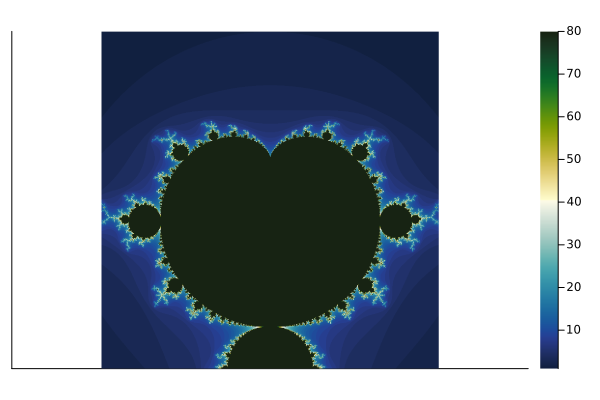

In [63]:
plotMandelbrot(collect(range(-1.0, 1.0, 1000)); N = 80) #take a while because it needs to compile the plot functions

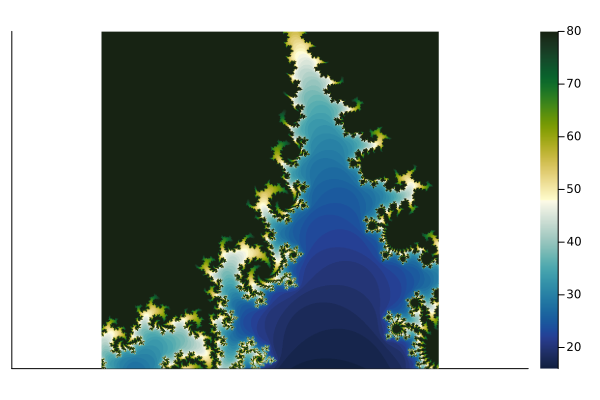

In [64]:
plotMandelbrot(collect(range(-0.55, -0.5, 1000)); N = 80)

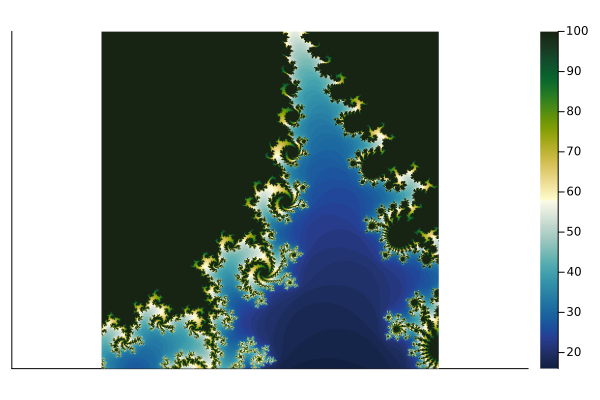

In [65]:
plotMandelbrot(collect(range(-0.55, -0.5, 1000)); N = 100)

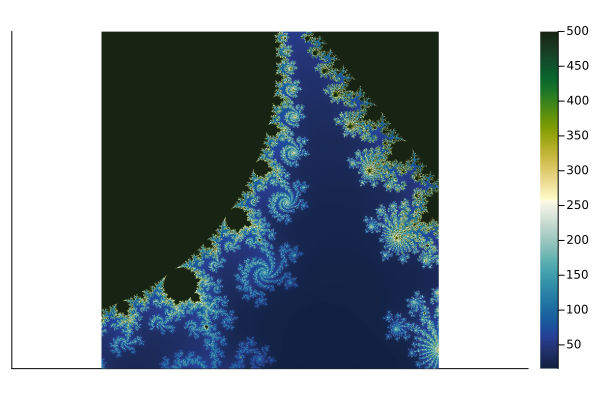

In [66]:
plotMandelbrot(collect(range(-0.55, -0.5, 1000)); N = 500)

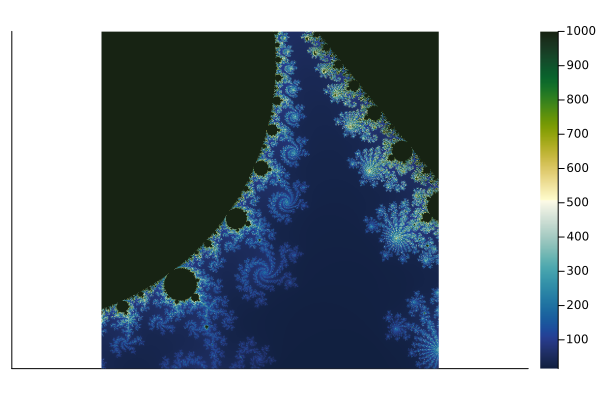

In [67]:
plotMandelbrot(collect(range(-0.55, -0.5, 1000)); N = 1_000)

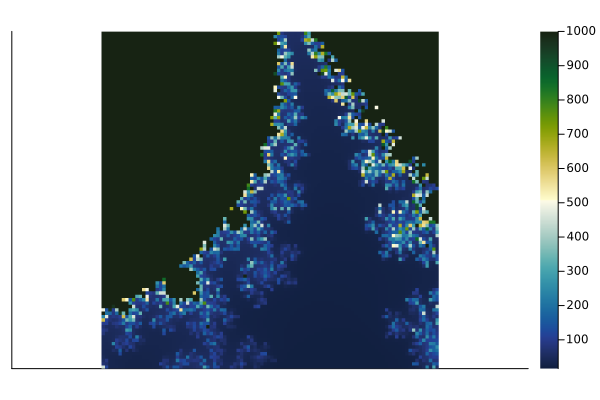

In [68]:
plotMandelbrot(collect(range(-0.55, -0.5, 100)); N = 1_000)

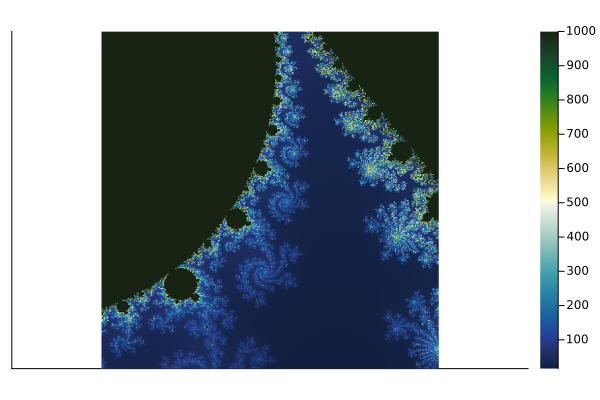

In [69]:
plotMandelbrot(collect(range(-0.55, -0.5, 500)); N = 1_000)

We observe that to get the details of the Mandelbrot set, the number of iterations must be higher than 100. In the tested iterations, 500 and more iterations gave the best details. Moreover, to have sharper resolutions of our Mandelbrot set, we need higher number of grids or shorter intervals.

# KR5

Plot of the time it takes for the function to run using @time macro for the given grid size ``n``.

We define a function that will return the time it takes to run the function ``plotMandelbrot()`` for different grid sizes ``n`` and iterations ``m``. We will refer to them as ``tmandelbrot_grid()`` and ``tmandelbrot_iter()``, respectively.

In [70]:
? tmandelbrot_grid

search: plotMandelbrot

Couldn't find tmandelbrot_grid
Perhaps you meant mandelbrot


No documentation found.

Binding `tmandelbrot_grid` does not exist.


In [71]:
"""
    tmandelbrot_grid( x )
Returns the time it takes to run the mandelbrot set for different grid sizes using ``@elapsed``.
-Input: `x` the grid sizes.
-Output: `delta_time` elapsed time.
"""

function tmandelbrot_grid( x )
    num = length(x)
    delta_time = zeros(num)
    for i in range(1, num)
        # Note that we converted x[i] since it should be an integer for the length or number of values in a range.
        delta_time[i] = @elapsed plotMandelbrot( collect(range(-1.0, 1.0, convert(Int64, x[i]))), N = 1000 ) # Getting the time.
    end
    return delta_time
end

tmandelbrot_grid (generic function with 1 method)

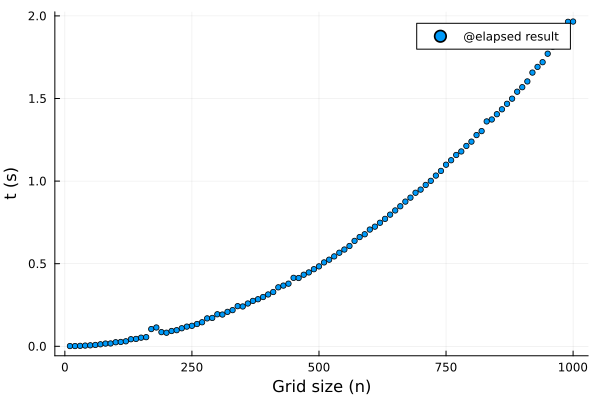

In [72]:
grid_size = range( 10, 1000, length = 100 )  # Values for the grid sizes.
Time_n = tmandelbrot_grid(grid_size)     # Time it takes to run for different grid sizes.

plot(scatter(grid_size, Time_n, mode = "markers", markersize = 3, label = "@elapsed result"), 
    xlabel = "Grid size (n)", ylabel= "t (s)")

In [73]:
? tmandelbrot_iter

search: tmandelbrot_grid plotMandelbrot

Couldn't find tmandelbrot_iter
Perhaps you meant tmandelbrot_grid


No documentation found.

Binding `tmandelbrot_iter` does not exist.


In [74]:
"""
    tmandelbrot_iter( x )
Returns the time it takes to run the mandelbrot set for different maximum number of iterations using ``@elapsed``.
-Input: `x` the maximum iteration.
-Output: `delta_time` elapsed time.
"""

function tmandelbrot_iter(x)
    num = length(x)
    delta_time = zeros(num)
    for i in range(1, num)
        delta_time[i] = @elapsed plotMandelbrot( collect(range(-1.0, 1.0, 500)), N = x[i] )
    end
    return delta_time
end

tmandelbrot_iter (generic function with 1 method)

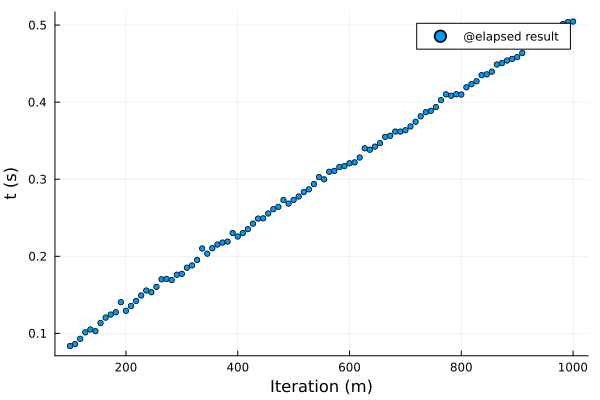

In [75]:
iter = range( 100, 1000, length = 100 )  # List of possible maximum iterations for the mandelbrot set. 
Time_m = tmandelbrot_iter( iter ) # Collection of time it takes for different iterations.

plot( scatter(iter, Time_m, mode = "markers", markersize = 3, label = "@elapsed result"), 
    xlabel = "Iteration (m)", ylabel= "t (s)" )

# KR6
Disuss the computational complexity of the Madelbrot function you made based onKR5. What is the best ``@time`` output to use for this?

To discuss the computational complexity of the Mandelbrot function, we use ``CurveFit`` to determine its behavior.

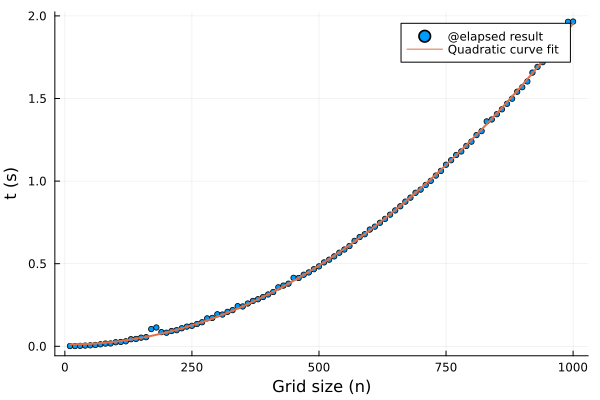

In [76]:
fit1, fit2, fit3 = curve_fit( Polynomial, grid_size, Time_n, 2 ) # Getting the constants for the fitted equation.

# Getting the values for time using the equation for the quadratic fit.
fitline = zeros( length(grid_size ))
for i in 1:length(grid_size)
    fitline[i] = fit1+fit2*grid_size[i]+fit3*grid_size[i]^2
end

# The actual result of the simulation and the curve fit.
plot( scatter(grid_size, Time_n, mode = "markers", markersize = 3, label = "@elapsed result"), 
    xlabel = "Grid size (n)", ylabel= "t (s)", label = "t" )
plot!( grid_size, fitline, linewidth = 2, label = "Quadratic curve fit" )

In [77]:
print("The equation for the curve fit is $(fit3) n^2 + $(fit2) n + $(fit1).")

The equation for the curve fit is 1.9763606420479975e-6 n^2 + -3.4160633442975324e-5 n + 0.01179528703176245.

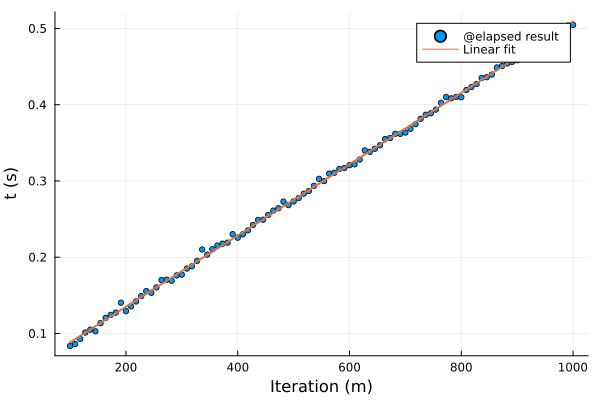

In [78]:
fitm1, fitm2 = curve_fit( Polynomial, iter, Time_m, 1 )  # Getting the constants for the fitted equation.

# Getting the values for time using the equation for the linear fit.
fitm = zeros(length(iter))
for i in 1:length(iter)
    fitm[i] = fitm1+fitm2*iter[i]
end

# The actual result of the simulation and the curve fit.
plot( scatter(iter, Time_m, mode = "markers", markersize = 3, label = "@elapsed result"), 
    xlabel = "Iteration (m)", ylabel= "t (s)")
plot!( iter, fitm, linewidth = 2, label = "Linear fit" )


In [79]:
print("The equation for the linear fit is $(fitm2) m + $(fitm1).")

The equation for the linear fit is 0.0004675629544277226 m + 0.041523718404752545.

In storing the time it takes, we use the macro ``@elapsed`` which only gives only the time in the ``@time`` for every value of the grid sizes ``n`` and iteration ``m``. Afterwards, to get a better description of the behavior for varying ``n`` and ``m``, we implemented a curve fit. Based on the resulting curve fit for the time it takes to run ``plotMandelbrot()`` which also contains the function ``mandelbrot()``, we get that the time complexity for grid sizes ``n`` is quadratic as shown by the quadratic fit. Moreover, we also showed that increasing the number of iteration ``n`` is directly proportional to time resulting to a linear fit. Thus, the time complexity for ``n`` is $\mathcal{O}(n^2)$ while it is $\mathcal{O}(m)$ for ``m``.